In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time as tm
import psycopg2 as pc
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline



In [2]:
''' QUERY DATA FROM SQL REDSHIFT'''

query = '''
WITH tmp_var AS (
	SELECT 
   '1/1/2019'::DATE AS SDate
	)

'''

df = import_sql(query)

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df.head()
df.tail()
df.info()
df.describe()
df.median()
df.head()
df.tail()

,dealer_id,name,location_state,location_latitude,location_longitude,dealer_creat_month,nr_listings_all,nr_brands,nr_models,nr_categories,...,lead_fiat_frac,lead_skoda_frac,revenuepps_groups,revenue_pps_mon_groups,cr_cat,list_to_lead_cat,revenue_pps_mon_cat,leads_sold_mon_cat,frequencypps_groups3,recencypps_groups3
0,648177,Dechent Automobile GmbH,Saarland,49.3137,6.7515,2018-02-01,488,7,54,10,...,0.0,0.000000,4,1,2,2,2,1,1,1
1,756187,Mense GmbH,Nordrhein-Westfalen,51.9005,8.3837,2018-03-01,233,6,22,9,...,0.0,0.000000,3,1,2,2,2,2,1,2
2,515694,Autohaus Wichert,Hamburg,53.5725,9.9497,2017-09-01,173,12,36,7,...,0.0,0.071429,1,1,2,2,1,1,1,1
3,509861,Gohm + Graf Hardenberg GmbH,Baden-Württemberg,47.7419,8.9710,2018-02-01,217,9,33,8,...,0.0,0.428571,2,1,3,1,2,2,1,1
4,513566,Autowelt Schuler Villingen GmbH,Baden-Württemberg,48.0667,8.4500,2017-11-01,1127,15,65,12,...,0.0,0.185185,4,1,3,1,3,3,2,2


,dealer_id,name,location_state,location_latitude,location_longitude,dealer_creat_month,nr_listings_all,nr_brands,nr_models,nr_categories,...,lead_fiat_frac,lead_skoda_frac,revenuepps_groups,revenue_pps_mon_groups,cr_cat,list_to_lead_cat,revenue_pps_mon_cat,leads_sold_mon_cat,frequencypps_groups3,recencypps_groups3
1015,517735,"Audi Zentrum Dortmund, Hülpert AZ GmbH",Nordrhein-Westfalen,51.5208,7.5184,2017-09-01,1282,4,34,8,...,0.000000,0.0000,5,2,2,2,3,3,3,1
1016,508479,Autowelt Schuler Donaueschingen GmbH,Baden-Württemberg,47.9551,8.4971,2017-11-01,804,7,50,10,...,0.000000,0.4500,1,1,2,1,1,2,1,1
1017,efgd2456,Ungeheuer Automobile GmbH Ettlingen,Baden-Württemberg,48.9409,8.4076,2018-03-01,1317,16,108,9,...,0.047619,0.0000,2,1,1,1,1,2,1,1
1018,512272,Auto & Service PIA GmbH,Bayern,48.1827,11.5759,2017-09-01,373,10,38,10,...,0.000000,0.4375,1,1,2,2,1,1,1,1
1019,559924,Procar Automobile GmbH Sprockhövel,Nordrhein-Westfalen,51.3467,7.2434,2018-07-01,229,12,79,10,...,0.000000,0.0000,4,1,3,2,3,3,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 75 columns):
dealer_id                      1020 non-null object
name                           1020 non-null object
location_state                 1020 non-null object
location_latitude              1020 non-null float64
location_longitude             1020 non-null float64
dealer_creat_month             1020 non-null object
nr_listings_all                1020 non-null int64
nr_brands                      1020 non-null int64
nr_models                      1020 non-null int64
nr_categories                  1020 non-null int64
network_size                   1020 non-null int64
is_active                      989 non-null float64
dealer_status                  1020 non-null object
report_status                  1020 non-null object
leads                          1020 non-null int64
leads_reported                 1020 non-null int64
leads_sold                     1020 non-null int64
leads_ppl      

,location_latitude,location_longitude,nr_listings_all,nr_brands,nr_models,nr_categories,network_size,is_active,leads,leads_reported,...,lead_fiat_frac,lead_skoda_frac,revenuepps_groups,revenue_pps_mon_groups,cr_cat,list_to_lead_cat,revenue_pps_mon_cat,leads_sold_mon_cat,frequencypps_groups3,recencypps_groups3
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.00000,989.0,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,50.815617,9.480320,698.442157,10.466667,54.664706,9.308824,10.30000,1.0,22.779412,22.080392,...,0.012929,0.062458,3.000000,1.187255,2.183333,1.458824,2.178431,2.231373,1.374510,1.438235
std,1.664761,2.093133,875.973099,6.151814,28.729241,1.641501,12.20202,0.0,22.204584,21.931274,...,0.067730,0.173719,1.414907,0.390307,0.767799,0.498546,0.808156,0.823714,0.614622,0.496414
min,47.500000,6.062700,9.000000,1.000000,2.000000,2.000000,1.00000,1.0,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,49.341225,7.746700,286.000000,6.000000,34.750000,8.000000,2.00000,1.0,9.000000,9.000000,...,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.750000,1.000000,1.000000
50%,51.025850,9.116850,494.500000,10.000000,50.000000,10.000000,6.00000,1.0,17.000000,16.000000,...,0.000000,0.000000,3.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
75%,52.000425,10.965900,829.250000,14.000000,70.000000,10.000000,14.00000,1.0,29.000000,27.000000,...,0.000000,0.022222,4.000000,1.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000
max,54.521600,14.969300,16153.000000,37.000000,262.000000,13.000000,62.00000,1.0,207.000000,207.000000,...,1.000000,1.000000,5.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000


location_latitude        51.02585
location_longitude        9.11685
nr_listings_all         494.50000
nr_brands                10.00000
nr_models                50.00000
                          ...    
list_to_lead_cat          1.00000
revenue_pps_mon_cat       2.00000
leads_sold_mon_cat        2.00000
frequencypps_groups3      1.00000
recencypps_groups3        1.00000
Length: 69, dtype: float64

,dealer_id,name,location_state,location_latitude,location_longitude,dealer_creat_month,nr_listings_all,nr_brands,nr_models,nr_categories,...,lead_fiat_frac,lead_skoda_frac,revenuepps_groups,revenue_pps_mon_groups,cr_cat,list_to_lead_cat,revenue_pps_mon_cat,leads_sold_mon_cat,frequencypps_groups3,recencypps_groups3
0,648177,Dechent Automobile GmbH,Saarland,49.3137,6.7515,2018-02-01,488,7,54,10,...,0.0,0.000000,4,1,2,2,2,1,1,1
1,756187,Mense GmbH,Nordrhein-Westfalen,51.9005,8.3837,2018-03-01,233,6,22,9,...,0.0,0.000000,3,1,2,2,2,2,1,2
2,515694,Autohaus Wichert,Hamburg,53.5725,9.9497,2017-09-01,173,12,36,7,...,0.0,0.071429,1,1,2,2,1,1,1,1
3,509861,Gohm + Graf Hardenberg GmbH,Baden-Württemberg,47.7419,8.9710,2018-02-01,217,9,33,8,...,0.0,0.428571,2,1,3,1,2,2,1,1
4,513566,Autowelt Schuler Villingen GmbH,Baden-Württemberg,48.0667,8.4500,2017-11-01,1127,15,65,12,...,0.0,0.185185,4,1,3,1,3,3,2,2


,dealer_id,name,location_state,location_latitude,location_longitude,dealer_creat_month,nr_listings_all,nr_brands,nr_models,nr_categories,...,lead_fiat_frac,lead_skoda_frac,revenuepps_groups,revenue_pps_mon_groups,cr_cat,list_to_lead_cat,revenue_pps_mon_cat,leads_sold_mon_cat,frequencypps_groups3,recencypps_groups3
1015,517735,"Audi Zentrum Dortmund, Hülpert AZ GmbH",Nordrhein-Westfalen,51.5208,7.5184,2017-09-01,1282,4,34,8,...,0.000000,0.0000,5,2,2,2,3,3,3,1
1016,508479,Autowelt Schuler Donaueschingen GmbH,Baden-Württemberg,47.9551,8.4971,2017-11-01,804,7,50,10,...,0.000000,0.4500,1,1,2,1,1,2,1,1
1017,efgd2456,Ungeheuer Automobile GmbH Ettlingen,Baden-Württemberg,48.9409,8.4076,2018-03-01,1317,16,108,9,...,0.047619,0.0000,2,1,1,1,1,2,1,1
1018,512272,Auto & Service PIA GmbH,Bayern,48.1827,11.5759,2017-09-01,373,10,38,10,...,0.000000,0.4375,1,1,2,2,1,1,1,1
1019,559924,Procar Automobile GmbH Sprockhövel,Nordrhein-Westfalen,51.3467,7.2434,2018-07-01,229,12,79,10,...,0.000000,0.0000,4,1,3,2,3,3,2,2


In [5]:
df.fillna(0,inplace = True)

In [6]:
# columns which are used for the clustering
cluster_cols = [ 'nr_listings_all', 'nr_brands','nr_categories','nr_models','network_size','leads','leads_reported','leads_sold',\
                'revenue','revenue_pps','revenue_ppl','revenue_pps_mon','frequency','recency','lor','frequencypps','recencypps',\
                'cr_reported','report_rate','listing_to_lead_all','avg_month_leads_sold','avg_month_leads','median_list_price',\
                'list_has_fdl_precalc_frac','list_vw_fraction','list_mercedesbenz_fraction','list_bmw_fraction','list_porsche_fraction',\
                'list_audi_fraction','list_fiat_fraction','list_skoda_fraction','lead_has_fdl_precalc_frac','lead_vw_frac',\
                'lead_mercedesbenz_frac','lead_bmw_frac','lead_porsche_frac','lead_audi_frac','lead_fiat_frac','lead_skoda_frac']

In [7]:
X = df[cluster_cols].as_matrix()
X_scale = preprocessing.scale(X)

C:\Users\Oxana\Anaconda3\envs\heycar\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [8]:
# determine optimal number of clusters
lab = []
index = []
distortions = []
silhouette = []
for k in range(2, 20):
    kmeans_model = KMeans(n_clusters=k).fit(X_scale)
    labels = kmeans_model.labels_
     #print (k, metrics.calinski_harabaz_score(principalDf, labels))
    lab.append(k)
    index.append(metrics.calinski_harabasz_score(X_scale, labels))
    distortions.append(sum(np.min(cdist(X_scale, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / X_scale.shape[0])
    silhouette.append(metrics.silhouette_score(X_scale, labels))


<Figure size 1080x576 with 0 Axes>

Text(0.5, 0, 'n cluster')

Text(0, 0.5, 'Distortion')

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

([<matplotlib.axis.XTick at 0x22efaa45208>,
 <a list of 18 Text xticklabel objects>)

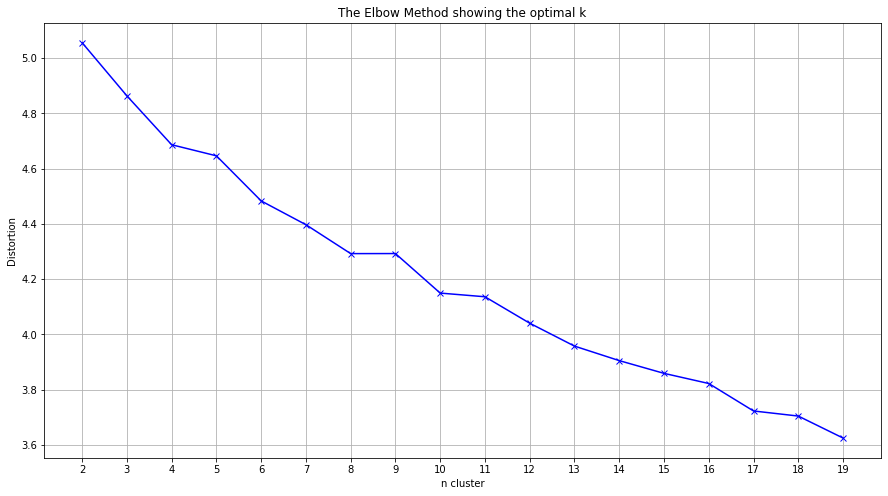

In [9]:
plt.figure(figsize = (15,8))
plt.plot(lab, distortions, 'bx-')
plt.xlabel('n cluster')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(np.arange(2, 20))
plt.grid()
plt.show()

<Figure size 1080x576 with 0 Axes>

Text(0.5, 0, 'n cluster')

Text(0, 0.5, 'Distortion')

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

([<matplotlib.axis.XTick at 0x22efab27f48>,
 <a list of 18 Text xticklabel objects>)

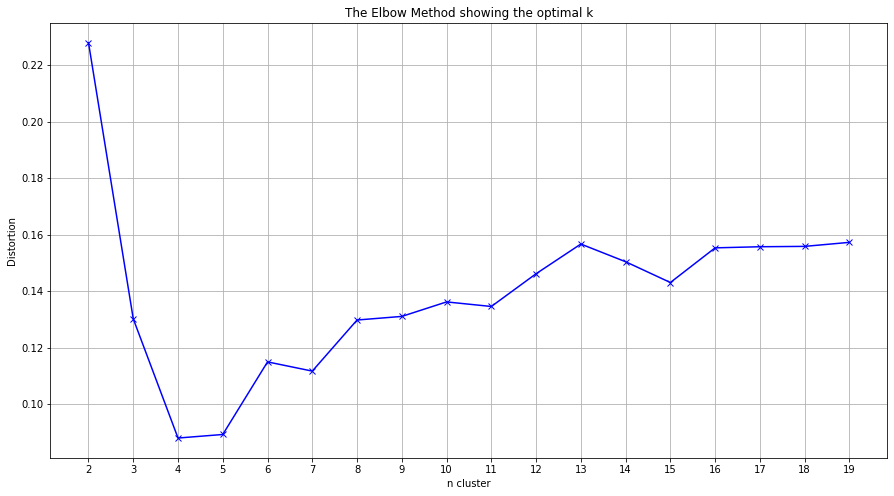

In [10]:
plt.figure(figsize = (15,8))
plt.plot(lab, silhouette, 'bx-')
plt.xlabel('n cluster')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(np.arange(2, 20))
plt.grid()
plt.show()

In [11]:
kmeans_model = KMeans(n_clusters=5, random_state=1).fit(X_scale)
df['cluster_label_5'] = kmeans_model.labels_

In [12]:
df_cluster = (df.groupby('cluster_label_5').dealer_id.count()).reset_index()
df_cluster.rename(index=str, columns={'dealer_id':'cluster_size'}, inplace=True)

In [13]:
df_cluster = df_cluster.merge(df.groupby('cluster_label_5').median().reset_index())

In [14]:
# df_cluster.to_csv('selling_dealer_clusters_median_5_clusters.csv')

In [15]:
df_cluster

,cluster_label_5,cluster_size,location_latitude,location_longitude,nr_listings_all,nr_brands,nr_models,nr_categories,network_size,is_active,...,lead_fiat_frac,lead_skoda_frac,revenuepps_groups,revenue_pps_mon_groups,cr_cat,list_to_lead_cat,revenue_pps_mon_cat,leads_sold_mon_cat,frequencypps_groups3,recencypps_groups3
0,0,109,50.9541,8.97050,1282.0,13.0,72.0,10.0,5.0,1.0,...,0.0,0.0,5.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0
1,1,87,51.1807,8.67120,189.0,6.0,23.0,8.0,5.0,1.0,...,0.0,0.0,2.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0
2,2,129,50.9675,9.13500,401.0,6.0,71.0,10.0,6.0,1.0,...,0.0,0.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0
3,3,414,50.8623,9.42235,569.5,9.0,46.5,10.0,5.0,1.0,...,0.0,0.0,3.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0
4,4,281,51.1843,8.64460,435.0,13.0,53.0,9.0,7.0,1.0,...,0.0,0.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0


In [16]:
pwd

'C:\\Users\\Oxana\\Documents\\1_HeyCar\\Python_queries\\Dealers'

## Analysis of the clusters


### Six dealer clusters
- 12%. Pretty new Mercedes dealers for HC, average sized and average sellers in higher than average pricing segment. High listing to lead but low CR
- 10%. Large dealers, the best sellers (the highest avg monthly revenue per dealer) in upper car price segment, sell various brands (good shares in sales of Audi,VW, mercedes)
- 24%. Medium size dealers, average performers selling cheap cars of various brands with pretty high CR but low listing to lead, good share of BMW in sales
- 14%. Small dealers selling well good cheap cars, with extremely high CR! Pretty high share of VW and skoda
- 0.26% (3 dealers). Small dealers of luxury segment: very high CR and high revenue
- 40%. Medium size dealers, average performers in average pricing segment, good shares of VW and audi

In [17]:
df.groupby('cluster_label_5').agg('median')

,location_latitude,location_longitude,nr_listings_all,nr_brands,nr_models,nr_categories,network_size,is_active,leads,leads_reported,...,lead_fiat_frac,lead_skoda_frac,revenuepps_groups,revenue_pps_mon_groups,cr_cat,list_to_lead_cat,revenue_pps_mon_cat,leads_sold_mon_cat,frequencypps_groups3,recencypps_groups3
cluster_label_5,,,,,,,,,,,,,,,,,,,,,
0,50.9541,8.97050,1282.0,13.0,72.0,10.0,5.0,1.0,51.0,46.0,...,0.0,0.0,5.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0
1,51.1807,8.67120,189.0,6.0,23.0,8.0,5.0,1.0,3.0,3.0,...,0.0,0.0,2.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0
2,50.9675,9.13500,401.0,6.0,71.0,10.0,6.0,1.0,19.0,19.0,...,0.0,0.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0
3,50.8623,9.42235,569.5,9.0,46.5,10.0,5.0,1.0,19.0,18.0,...,0.0,0.0,3.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0
4,51.1843,8.64460,435.0,13.0,53.0,9.0,7.0,1.0,13.0,13.0,...,0.0,0.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0


C:\Users\Oxana\Anaconda3\envs\heycar\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


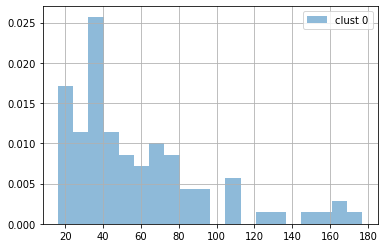

In [18]:
df[df.cluster_label_5==1].revenue_pps_mon.hist(alpha=0.5, normed=True, bins=20, label='clust 0')

plt.legend()

In [19]:
df.head()

,dealer_id,name,location_state,location_latitude,location_longitude,dealer_creat_month,nr_listings_all,nr_brands,nr_models,nr_categories,...,lead_skoda_frac,revenuepps_groups,revenue_pps_mon_groups,cr_cat,list_to_lead_cat,revenue_pps_mon_cat,leads_sold_mon_cat,frequencypps_groups3,recencypps_groups3,cluster_label_5
0,648177,Dechent Automobile GmbH,Saarland,49.3137,6.7515,2018-02-01,488,7,54,10,...,0.000000,4,1,2,2,2,1,1,1,3
1,756187,Mense GmbH,Nordrhein-Westfalen,51.9005,8.3837,2018-03-01,233,6,22,9,...,0.000000,3,1,2,2,2,2,1,2,3
2,515694,Autohaus Wichert,Hamburg,53.5725,9.9497,2017-09-01,173,12,36,7,...,0.071429,1,1,2,2,1,1,1,1,3
3,509861,Gohm + Graf Hardenberg GmbH,Baden-Württemberg,47.7419,8.9710,2018-02-01,217,9,33,8,...,0.428571,2,1,3,1,2,2,1,1,4
4,513566,Autowelt Schuler Villingen GmbH,Baden-Württemberg,48.0667,8.4500,2017-11-01,1127,15,65,12,...,0.185185,4,1,3,1,3,3,2,2,3


<Figure size 1152x648 with 0 Axes>

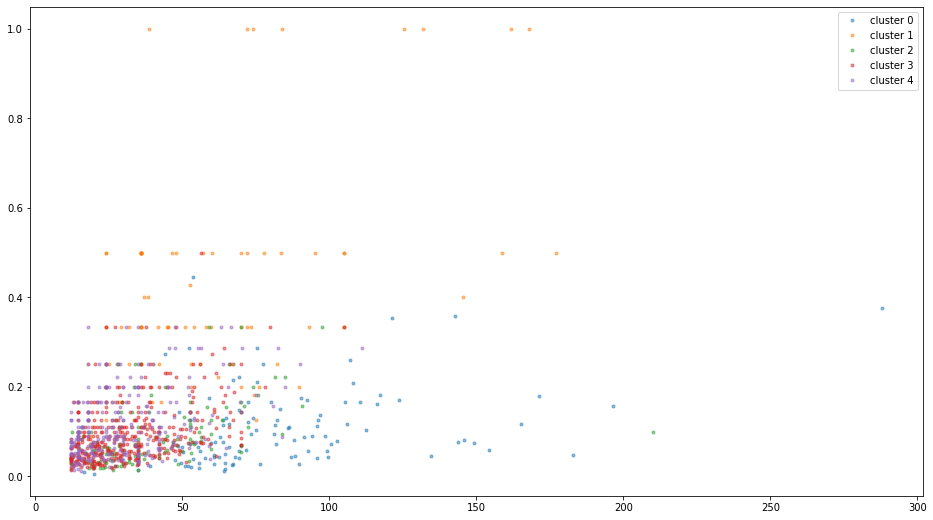

In [20]:
plt.figure(figsize=(16,9))
for i in np.arange(5):
    plt.plot(df[df.cluster_label_5==i].revenue_pps_mon, df[df.cluster_label_5==i].cr_reported, '.', alpha =0.5, label='cluster '+str(i))
#plt.axis([0,200000,0,100000])
plt.legend()

<Figure size 1152x648 with 0 Axes>

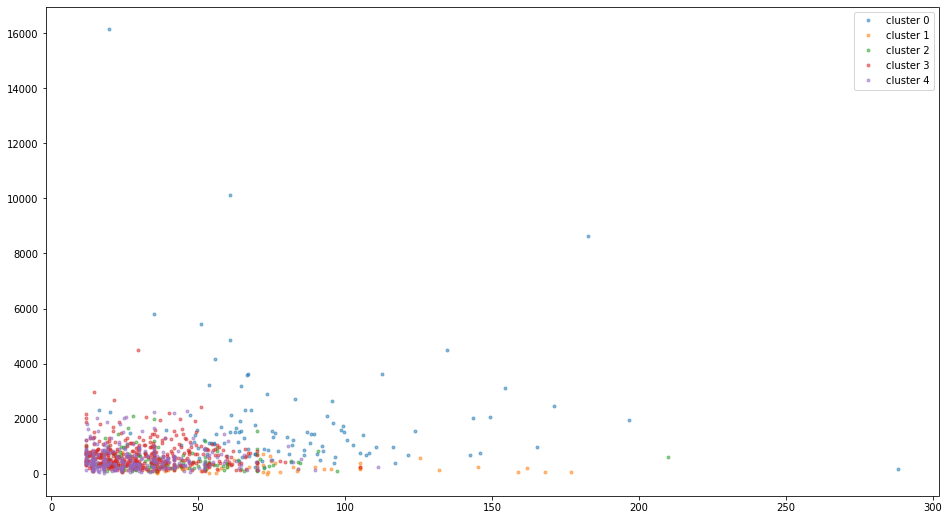

In [21]:
plt.figure(figsize=(16,9))
for i in np.arange(5):
    plt.plot(df[df.cluster_label_5==i].revenue_pps_mon, df[df.cluster_label_5==i].nr_listings_all, '.', alpha =0.5, label='cluster '+str(i))
#plt.axis([0,200000,0,100000])
plt.legend()

<Figure size 1152x648 with 0 Axes>

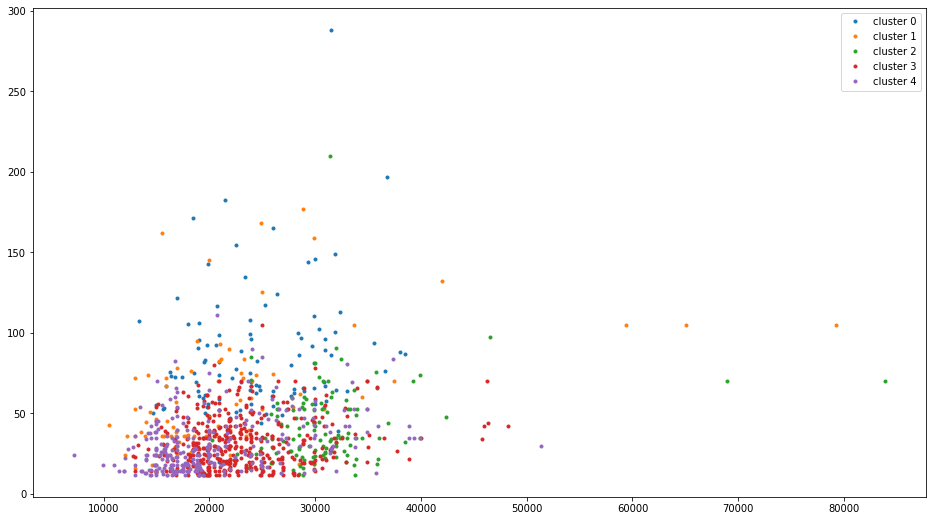

In [22]:
plt.figure(figsize=(16,9))
for i in np.arange(5):
    plt.plot(df[df.cluster_label_5==i].median_list_price, df[df.cluster_label_5==i].revenue_pps_mon, '.', alpha =1, label='cluster '+str(i))
#plt.axis([0,200000,0,3000])
plt.legend()

<Figure size 1152x648 with 0 Axes>

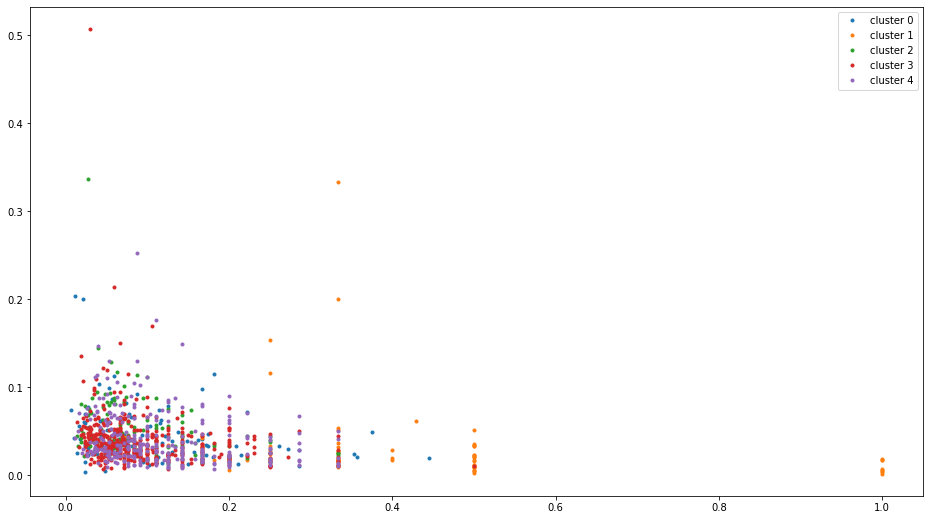

In [23]:
plt.figure(figsize=(16,9))
for i in np.arange(5):
    plt.plot(df[df.cluster_label_5==i].cr_reported, df[df.cluster_label_5==i].listing_to_lead_all, '.', alpha =1, label='cluster '+str(i))
#plt.axis([0,200000,0,3000])
plt.legend()